# Checkpoints Part 1

## Spark funds -  Asset Management Company

<b> Objective </b> - CEO of our company wants to invest money in few companies. Her investments will be guided by global trend in the investments (on where do most of the investors are investing)

<b> Constraints </b>-

<ul>
    <li> Wants to do investment in the range of 5 to 15 USM million dollars </li>
    <li> Wants to do investment in only English speaking countries </li>
</ul>

<b> Buisness Objective </b>-

To invest where others are investing, implying that the 'best' sectors and countries are the ones 'where most investors are investing'.

<b> Data analusis Objectives </b> -

<ul>
    <li> To understand which Investment types are attracting the most of the investments. </li>
    <li> To understand which are the countries attracting most of the investments.  </li>
    <li> To understand which are the Main sectors (8 main) attracting most of the investments.  </li>
</ul>


# Checkpoint 1: Data Cleaning 1

In [1]:
# import all libraries for this stage
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests 
from bs4 import BeautifulSoup as soup

In [3]:
companies = pd.read_csv(r"C:\Users\abc\Downloads\AI-ML\git\assignments\First Assignment\csv\companies.csv", encoding='palmos')
rounds2 = pd.read_csv(r"C:\Users\abc\Downloads\AI-ML\git\assignments\First Assignment\csv\rounds2.csv", encoding='palmos')
mapping = pd.read_csv(r"C:\Users\abc\Downloads\AI-ML\git\assignments\First Assignment\csv\mapping.csv", encoding='palmos')

In [285]:
#companies = pd.read_csv(r"C:\Users\abc\Downloads\AI-ML\git\assignments\First Assignment\temp_csv\companies.txt",encoding='ISO-8859-1',sep='\t')
#rounds2 = pd.read_csv(r"C:\Users\abc\Downloads\AI-ML\git\assignments\First Assignment\temp_csv\rounds2.csv",encoding='ISO-8859-1')
#mapping = pd.read_csv(r"C:\Users\abc\Downloads\AI-ML\git\assignments\First Assignment\temp_csv\mapping.csv")

In [4]:
# analyse companies
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [5]:
# analyse rounds2
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


# Initial Analysis

In [6]:
#converting values to lower case for permalink as letters have different cases
rounds2.company_permalink = rounds2.company_permalink.apply(lambda x : str.lower(x))
companies.permalink = companies.permalink.apply(lambda x : str.lower(x))

## No of unique companies in companies

In [7]:
companies.permalink.nunique()

66368

## No of unique companies in rounds2

In [9]:
rounds2.company_permalink.nunique()

66368

### Let's see which colums are contenstant for to be unique, broadly there are two <font color ='red'> name </font>  and <font color ='red'> permalink</font> 
Now let's see whether this columns contain any duplicate data or not

In [10]:
companies[companies.permalink.duplicated()]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at


In [11]:
companies.name[companies.name.duplicated()]

282         3DIVAZ
1527        Adtena
1996         Agora
3006        Amicus
3091     Amplitude
           ...    
64571       Wunder
64572       Wunder
65799        Gusto
65899        Zesty
66029      ZingBox
Name: name, Length: 268, dtype: object

In [12]:
companies[companies.name.duplicated()].head(5)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
282,/organization/3divaz-3,3DIVAZ,http://www.3divaz.ch/Home,NaN,operating,CHE,1,CHE - Other,Wildegg,01-07-2014
1527,/organization/adtena-2,Adtena,http://adtena.com,NaN,closed,NaN,NaN,NaN,NaN,15-11-2014
1996,/organization/agora-6,Agora,https://www.agora.co,Android|Apps|Internet|Mobile,operating,USA,NY,New York City,New York,01-07-2013
3006,/organization/amicus-co,Amicus,http://www.amicus.co,Apps|Mobile|Mobile Commerce,operating,IND,7,New Delhi,New Delhi,01-01-2015
3091,/organization/amplitude-2,Amplitude,http://amplitude-technologies.com/,Electronics,operating,FRA,A8,Ãƒâ€°vry,Ã‰vry,01-01-2001


As we can see from above data that <font color ='red'> name </font> column has duplicate data whereas <font color ='red'> permalink </font> has no duplicate data. And where name is duplicated there we have different permalink. So it's clear we that we have to take <b> permalink as our unique column. </b>

<b> Let's see whether there are any companies in the rounds2 file which are not  present in companies

In [14]:
list(set(rounds2.company_permalink)-set(companies.permalink))

[]

So there are no companies which are not present in companies file

# Merging the two dataframes

Before this let's rename company_permalink to permalink for better understanding

In [15]:
rounds2 = rounds2.rename(columns={'company_permalink':'permalink'})

### Merging two dataframes, using inner join as we common data only

In [16]:
master_frame = pd.merge(left=rounds2,right=companies,how='inner',on='permalink')
master_frame.count()

permalink                  114949
funding_round_permalink    114949
funding_round_type         114949
funding_round_code          31140
funded_at                  114949
raised_amount_usd           94959
name                       114948
homepage_url               108815
category_list              111539
status                     114949
country_code               106271
state_code                 104003
region                     104782
city                       104785
founded_at                  94428
dtype: int64

# Data cleaning

Let's try to find out which column has null or blank values.
Let's plot heat map of null values in each column

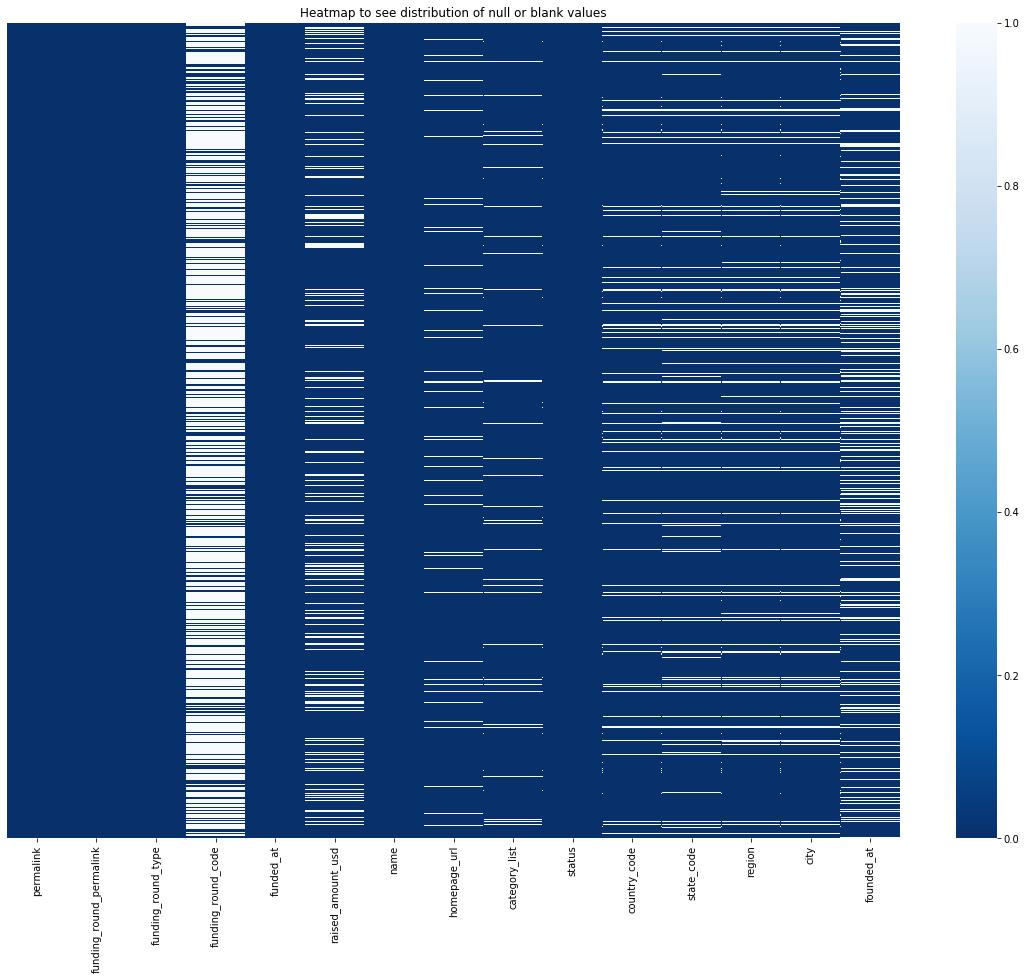

In [297]:
plt.figure(figsize=(20,15))
sns.heatmap(master_frame.isna(),cbar=True, yticklabels=False, cmap="Blues_r" )
plt.title("Heatmap to see distribution of null or blank values")
plt.show()

We can see from above heatmap that funding_round_code and founded_at fields have most of the null or blank values.
Now let's try to figure out which are the columns which are necessary for our analysis so that we can get rid of other columns.

<ul>
    <li>permalink - It's necessary as it contains unique id</li>
    <li>funding_round_permalink - Not necessary</li>
    <li>funding_round_type - Necessary</li>
    <li>funding_round_code - Not necessary</li>
    <li>funded_at - Not necessary</li>
    <li>raised_amount_usd - Necessary</li>
    <li>name - Necessary</li>
    <li>homepage_url - Not necessary</li>
    <li>category_list - Necessary</li>
    <li>status - not necessary</li>
    <li>country_code - necessary</li>
    <li>state_code - Not necessary</li>
    <li>region - Not necessary</li>
    <li>city - Not necessary</li>
    <li>founded_at -Not necessary</li>
</ul>

In [298]:
master_frame = master_frame[['permalink', 'funding_round_type', 'raised_amount_usd', 'name','category_list', 'country_code']]

Let's see now how many null values are present

### Only selecting those fund types in which company is interested (We can do this as funding_round_type has no blank or null values)

Before selecting let's see value counts to see whether naming is uniform or not

In [299]:
master_frame.funding_round_type.value_counts() #no issues

venture                  55493
seed                     30518
debt_financing            6895
angel                     6094
undisclosed               4897
equity_crowdfunding       3257
private_equity            2285
grant                     2200
convertible_note          1817
post_ipo_equity            638
product_crowdfunding       410
non_equity_assistance      191
post_ipo_debt              152
secondary_market            95
Name: funding_round_type, dtype: int64

In [300]:
master_frame = master_frame[master_frame.funding_round_type.isin(['venture','seed','private_equity','angel'])]

In [301]:
master_frame.isnull().sum()

permalink                 0
funding_round_type        0
raised_amount_usd     13764
name                      1
category_list          2494
country_code           7314
dtype: int64

As we have to find top performing countries we can't ignore data where country is not preset besides we could have founded the name of the country by fetching details on city but as even that information is not present we're simply dropping all the rows.

In [302]:
master_frame = master_frame[~master_frame.country_code.isnull()]

In [303]:
master_frame.isnull().sum()

permalink                 0
funding_round_type        0
raised_amount_usd     11470
name                      1
category_list          1142
country_code              0
dtype: int64

Now as we can see there are 11470 rows which don't have raised_amount_usd values.
I can't directly drop this values as my analysis depends on number of investments in each country.

Let's see distribution of the null values across countries

In [304]:
temp = master_frame[master_frame.raised_amount_usd.isnull()].groupby('country_code')['country_code'].count().sort_values(ascending=False)

<function matplotlib.pyplot.show(*args, **kw)>

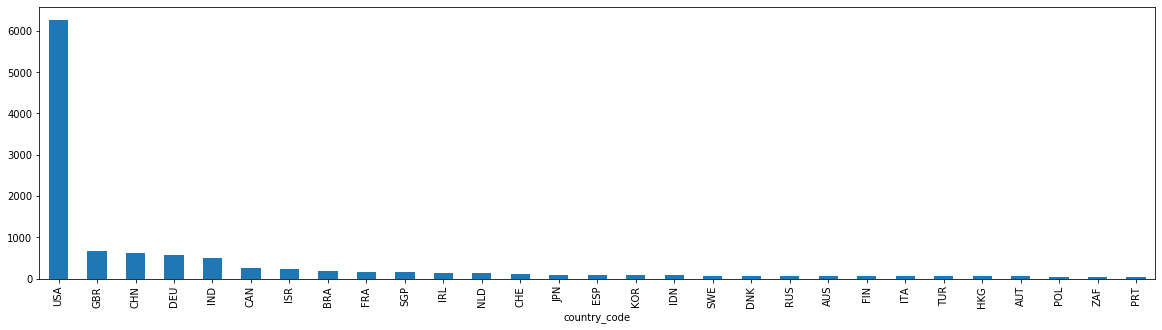

In [305]:
temp[temp > 30].plot.bar(figsize=(20,5))
plt.show

Clearly from above table we can see that if I remove all values which doens't have raised_amount_usd then USA will have 
disadvantage. As our analysis depends on number of investments in each country we have to consider imputing values null raised_amount_usd value.

Before theat we have to figure out mean values for each country but before that let's remove outliners. We will look for outliers on funding type basis.

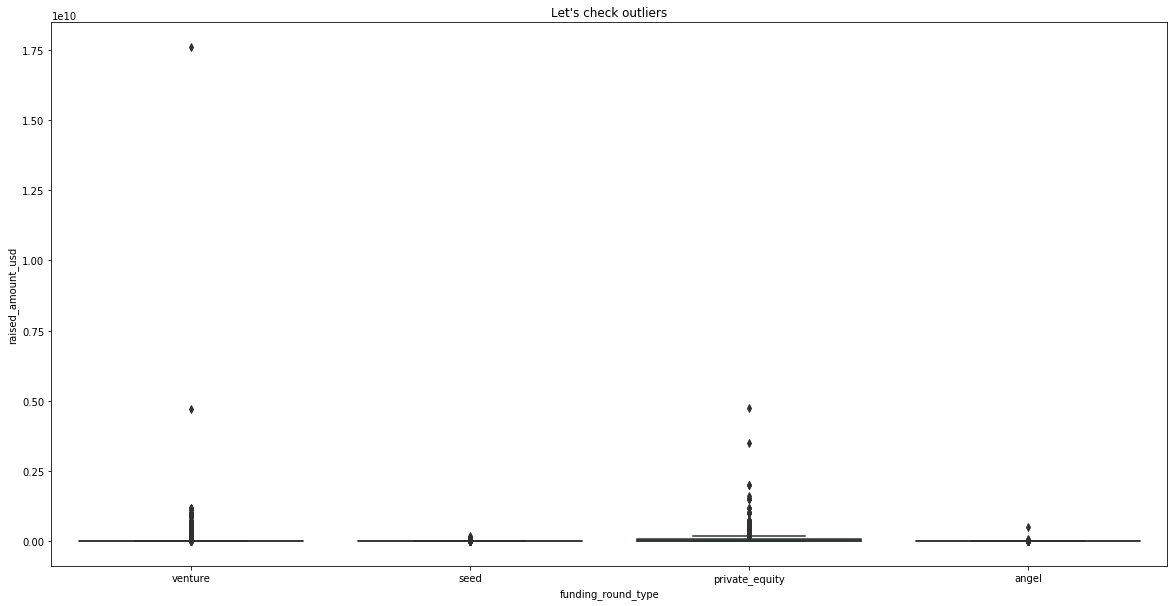

In [306]:
plt.figure(figsize=(20,10))
plt.title("Let's check outliers")
sns.boxplot(data=master_frame,x='funding_round_type',y='raised_amount_usd', palette='colorblind')
plt.show()

In [307]:
master_frame[(master_frame.raised_amount_usd > 15000000000)]

,permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
37567,/organization/freescale,venture,1.760000e+10,Freescale Semiconductor,Semiconductors,USA


In [308]:
#Let's remove outlier from venture funding type
master_frame = master_frame[~(master_frame.raised_amount_usd > 15000000000)]

In [309]:
master_frame.reset_index(inplace=True)

In [310]:
count_raised_mean = pd.DataFrame(master_frame.groupby('country_code')['raised_amount_usd'].mean()).reset_index().rename(columns={'raised_amount_usd':'mean'})

In [311]:
master_frame = pd.merge(left=master_frame,right=count_raised_mean,how='inner',left_on='country_code',right_on='country_code')

In [312]:
master_frame['raised_amount_usd'] = master_frame['raised_amount_usd'].combine_first(master_frame['mean'])

In [313]:
master_frame.drop(['mean'],axis=1,inplace=True)

Now as we replace all null raised amount values by mean values, let's see how many null values still left

In [314]:
master_frame.isnull().sum()

index                    0
permalink                0
funding_round_type       0
raised_amount_usd        3
name                     1
category_list         1142
country_code             0
dtype: int64

 Let's keep blank values for category_list for analysis as we can see others column is present in mapping file for blank values

Giving name to the company whose name is missing

In [315]:
master_frame[master_frame.name.isnull()] #let's give a name to this company

,index,permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
52308,98688,/organization/tell-it-in,seed,25000.0,NaN,Startups,USA


In [316]:
master_frame.loc[master_frame[master_frame.name.isnull()].index.item(),'name'] = master_frame[master_frame.name.isnull()].permalink.item().split("/")[2]

In [317]:
master_frame.isnull().sum()

index                    0
permalink                0
funding_round_type       0
raised_amount_usd        3
name                     0
category_list         1142
country_code             0
dtype: int64

In [318]:
master_frame.reset_index(inplace=True)

In [319]:
master_frame.raised_amount_usd

0        1.000000e+07
1        1.355249e+07
2        1.355249e+07
3        6.369507e+06
4        4.000000e+06
             ...     
87070    2.000000e+06
87071    3.500000e+04
87072    2.500000e+04
87073    1.440318e+07
87074    1.484000e+07
Name: raised_amount_usd, Length: 87075, dtype: float64

# Checkpoint 2: Funding Type Analysis

### Finding mean for each type of funding type

In [320]:
master_frame.groupby('funding_round_type')['raised_amount_usd'].mean().sort_values()

funding_round_type
seed              2.450737e+06
angel             2.743835e+06
venture           1.139524e+07
private_equity    6.514007e+07
Name: raised_amount_usd, dtype: float64

### As company wants to do investment in the range of 5M to 15M only venture is satisfying the condition

In [321]:
master_frame.groupby('funding_round_type')['raised_amount_usd'].mean().between(5000000,15000000, inclusive=True)

funding_round_type
angel             False
private_equity    False
seed              False
venture            True
Name: raised_amount_usd, dtype: bool

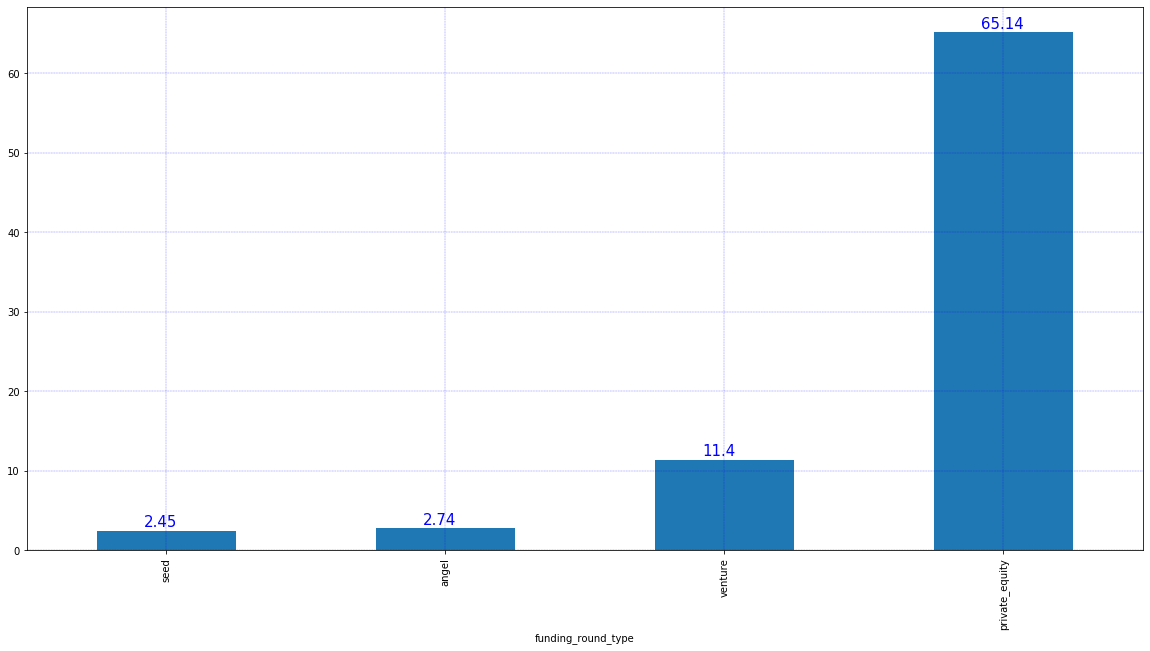

In [322]:
plt.figure(figsize=(20,10))
master_frame["funding_amount_in_milion"] = master_frame.raised_amount_usd.apply(lambda x : x/1000000)
ax = master_frame.groupby('funding_round_type')['funding_amount_in_milion'].mean().sort_values().plot.bar()
ax.grid(color='b', ls = '-.', lw = 0.25)
for i in ax.patches:
    ax.text(i.get_x() + (i.get_width()/2-0.08) , i.get_height()+0.5, str(round((i.get_height()), 2)), fontsize=15, color='blue')

### So selecting only those rows which has funding type as venture

In [323]:
master_frame = master_frame[master_frame.funding_round_type == 'venture']

# Checkpoints part - 2

Let's get the details of the countries which have english as there official language of communication

<b> Now we have to see which countries are English speaking countries for this we will use web scrapping technique to get data 
from wikipedia. </b>

In [324]:
from bs4 import BeautifulSoup 
def en_con_details():
    r = requests.get("https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language") 
    soup = BeautifulSoup(r.text, 'lxml') # Parse the HTML as a string
    table = soup.find_all('table')
    
    headers = []
    tb = 0
    global  off_en_counts
    r = 1
    r_len = len(table[0].find_all('tr')) + len(table[1].find_all('tr'))
    while tb < 2:
        t = table[tb]
        tr_elements = t.find_all('tr')
        for i in range(0,len(tr_elements)):
            
            if i == 0 :
                r -= 1
                if tb == 0:
                    for j in tr_elements[i].find_all('th'):
                        headers.append(str.strip(j.text))
                    off_en_counts = pd.DataFrame([],columns=headers,index=range(0,r_len-2))
            elif i != 0:
                l = 0
                for k in tr_elements[i].find_all('td'):
                    off_en_counts.iloc[r-1,l] = str.strip(k.text)
                    l+=1
            r+=1
        tb+=1
    return off_en_counts

In [325]:
off_en_counts = en_con_details()  

Let's do data cleaning and remove unwanted columns

In [326]:
off_en_counts.drop(['Nr','Region','Population','Primary language?'], axis=1,inplace=True)
off_en_counts['Country'] = off_en_counts['Country'].apply(lambda x : x.split("[")[0])

Now let's merge the <b>off_en_counts </b> and <b> master_frame </b>

In [327]:
off_en_counts = off_en_counts.rename(columns={'Alpha-3 code':'country_code'})

## Checkpoint 3: Country Analysis

In [328]:
master_frame = pd.merge(left=master_frame,right=off_en_counts,how='inner',left_on='country_code',right_on='country_code')

In [329]:
master_frame.reset_index(drop=True,inplace=True)

In [330]:
del master_frame['index']

In [331]:
top9 = master_frame[master_frame.country_code.isin(master_frame.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)[0:9].index)]

In [332]:
top9.head(5)

,level_0,permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,funding_amount_in_milion,Country
0,0,/organization/-fame,venture,1.000000e+07,#fame,Media,IND,10.000000,India
1,1,/organization/1000lookz,venture,1.355249e+07,1000Lookz,Beauty,IND,13.552490,India
2,3,/organization/21diamonds-india,venture,6.369507e+06,21Diamonds,E-Commerce,IND,6.369507,India
3,4,/organization/247-learning-private,venture,4.000000e+06,24x7 Learning,EdTech|Education|Systems,IND,4.000000,India
4,6,/organization/3dsoc,venture,1.240000e+06,3DSoC,3D|Mobile,IND,1.240000,India


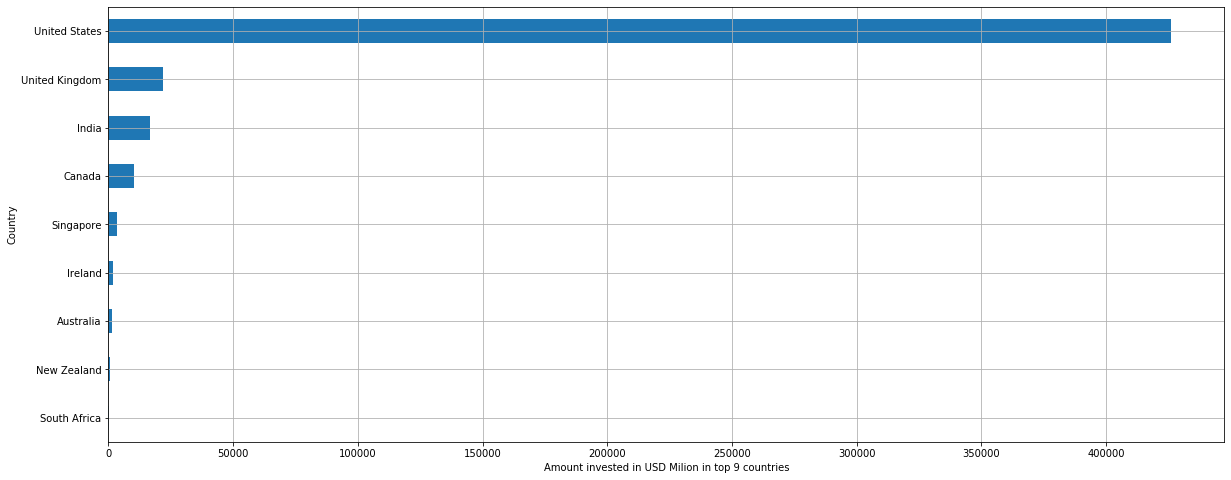

In [333]:
plt.figure(figsize=(20,8))
top9.groupby('Country')['funding_amount_in_milion'].sum().sort_values().plot.barh(grid=True)
plt.xlabel("Amount invested in USD Milion in top 9 countries" )
plt.show()

### Top 3 English speaking performing countries

In [334]:
top9.groupby('Country')['raised_amount_usd'].sum().sort_values(ascending=False)[0:3]

Country
United States     4.261645e+11
United Kingdom    2.189901e+10
India             1.666868e+10
Name: raised_amount_usd, dtype: float64

# Checkpoint 4: Sector Analysis 1

## Now let's merge master_dataframe with mapping sheet (which contains mapping of categories with main sector)

In [335]:
mapping['main_sector'] = mapping.loc[:,mapping.columns[1]:].dot(mapping.columns[1:])

In [336]:
mapping = mapping[['category_list','main_sector']]

<b>Let's merge the mapping file and master_frame</b>

Before that we have to process those categories which have multiple secotors.

In [337]:
top9.category_list = top9.category_list.apply(lambda x: str(x).split("|")[0])

F:\Amar-AIML\Softwares\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [338]:
top9 = pd.merge(left=top9,right=mapping,how='inner',left_on='category_list',right_on='category_list')
top9.tail(5)

,level_0,permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,funding_amount_in_milion,Country,main_sector
42641,72389,/organization/vocalizr,venture,3.917695e+06,Vocalizr,Music Services,AUS,3.917695,Australia,Entertainment
42642,76121,/organization/membrane-instruments-and-technology,venture,7.833322e+06,Membrane Instruments and Technology,Musical Instruments,SGP,7.833322,Singapore,Entertainment
42643,78225,/organization/meetingsbooker-com,venture,1.271800e+06,Meetingsbooker.com,Business Travelers,IRL,1.271800,Ireland,Entertainment
42644,78417,/organization/taxworld,venture,4.647665e+06,Taxworld,Taxis,IRL,4.647665,Ireland,Others
42645,85839,/organization/mozambique-tourism,venture,2.720000e+07,Mozambique Tourism,Tourism,ZAF,27.200000,South Africa,Entertainment


# Checkpoint 5: Sector Analysis 2
## Creating seperate dataframe for each country

In [339]:
D1 = top9[top9.country_code == 'USA']

In [340]:
D1_agg = pd.DataFrame(D1.groupby('main_sector')['raised_amount_usd'].agg(['sum','count'])).reset_index().rename(columns={'sum':'Total Investment','count':'Investment count'})
D1 = pd.merge(left=D1,right=D1_agg,how='inner',on='main_sector')

In [341]:
D2 =  top9[top9.country_code == 'GBR']

In [342]:
D2_agg = pd.DataFrame(D2.groupby('main_sector')['raised_amount_usd'].agg(['sum','count'])).reset_index().rename(columns={'sum':'Total Investment','count':'Investment count'})
D2 = pd.merge(left=D2,right=D2_agg,how='inner',on='main_sector')

In [343]:
D3 =  top9[top9.country_code == 'IND']

In [344]:
D3_agg = pd.DataFrame(D3.groupby('main_sector')['raised_amount_usd'].agg(['sum','count'])).reset_index().rename(columns={'sum':'Total Investment','count':'Investment count'})
D3 = pd.merge(left=D3,right=D3_agg,how='inner',on='main_sector')

<b> Let's find out total number of investments for each country

In [345]:
top9.groupby('country_code')['country_code'].count().sort_values(ascending=False)

country_code
USA    37331
GBR     2218
CAN     1309
IND      955
SGP      277
IRL      258
AUS      215
NZL       49
ZAF       34
Name: country_code, dtype: int64

<b> Let's find out total amound of investment for each country </b>

In [346]:
top9.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)[0:3]

country_code
USA    4.143448e+11
GBR    2.117092e+10
IND    1.625908e+10
Name: raised_amount_usd, dtype: float64

In [347]:
D1[['main_sector','Investment count']].drop_duplicates().sort_values(by='Investment count',ascending=False)

,main_sector,Investment count
5292,Others,8693
24091,Cleantech / Semiconductors,8112
16628,"Social, Finance, Analytics, Advertising",7463
32769,"News, Search and Messaging",4562
1888,Health,3404
13985,Manufacturing,2643
0,Entertainment,1888
32203,Automotive & Sports,566


In [348]:
D2[['main_sector','Investment count']].drop_duplicates().sort_values(by='Investment count',ascending=False)

,main_sector,Investment count
283,Others,571
986,"Social, Finance, Analytics, Advertising",457
1443,Cleantech / Semiconductors,456
1953,"News, Search and Messaging",265
0,Entertainment,157
854,Manufacturing,132
157,Health,126
1899,Automotive & Sports,54


In [349]:
D3[['main_sector','Investment count']].drop_duplicates().sort_values(by='Investment count',ascending=False)

,main_sector,Investment count
144,Others,329
537,"Social, Finance, Analytics, Advertising",169
801,"News, Search and Messaging",154
0,Entertainment,88
473,Manufacturing,64
706,Cleantech / Semiconductors,63
88,Health,56
769,Automotive & Sports,32


In [350]:
D1[D1.main_sector == 'Others'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False)[:1]

name
SoFi    1.365200e+09
Name: raised_amount_usd, dtype: float64

In [351]:
D2[D2.main_sector == 'Others'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False)[:1]

name
OneWeb    500000000.0
Name: raised_amount_usd, dtype: float64

In [352]:
D3[D3.main_sector == 'Others'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False)[:1]

name
Flipkart    2.451000e+09
Name: raised_amount_usd, dtype: float64

In [353]:
D1[D1.main_sector == 'Cleantech / Semiconductors'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False)[:1]

name
Juno Therapeutics    1.159803e+09
Name: raised_amount_usd, dtype: float64

In [354]:
D2[D2.main_sector == 'Cleantech / Semiconductors'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False)[:1]

name
Immunocore    320000000.0
Name: raised_amount_usd, dtype: float64

In [355]:
D3[D3.main_sector == 'Cleantech / Semiconductors'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False)[:1]

name
CaptureSolar Energy    125000000.0
Name: raised_amount_usd, dtype: float64

# Checkpoint 6: Plots

In [356]:
top3 = top9[top9.Country.isin(list(top9.groupby('Country')['raised_amount_usd'].sum().sort_values(ascending=False)[0:3].index))]

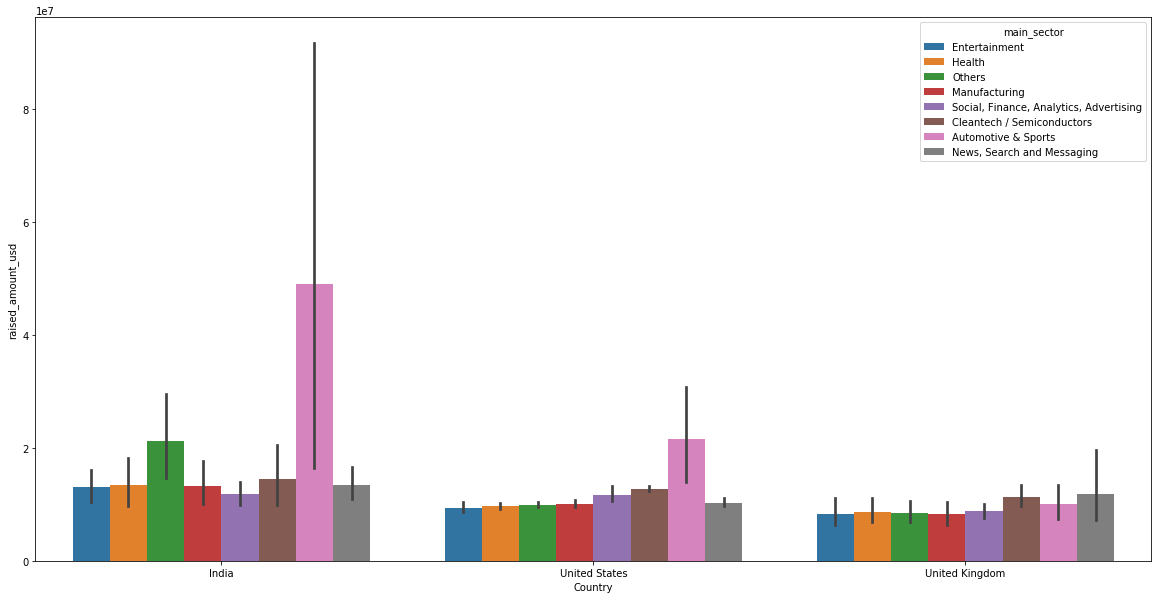

In [357]:
plt.figure(figsize=(20,10))
sns.barplot(x="Country", y="raised_amount_usd", hue="main_sector", data=top3)
plt.show()

In [358]:
top9.groupby('Country')['raised_amount_usd'].sum().sort_values(ascending=False)[0:3].index

Index(['United States', 'United Kingdom', 'India'], dtype='object', name='Country')

# Canada vs India ---- choosing values in multilevel index

In [359]:
report = top3.groupby(['Country','main_sector'])['Country'].agg(['count']).sort_values(by=(['Country','count']),ascending=False)

In [360]:
report.loc[['United States','India']][0:3]

count
Country       main_sector                                   
United States Others                                    8693
              Cleantech / Semiconductors                8112
              Social, Finance, Analytics, Advertising   7463

In [361]:
top3.groupby(['Country','main_sector'])['Country'].agg(['count']).sort_values(by=(['Country','count']),ascending=False)

count
Country        main_sector                                   
United States  Others                                    8693
               Cleantech / Semiconductors                8112
               Social, Finance, Analytics, Advertising   7463
               News, Search and Messaging                4562
               Health                                    3404
               Manufacturing                             2643
               Entertainment                             1888
               Automotive & Sports                        566
United Kingdom Others                                     571
               Social, Finance, Analytics, Advertising    457
               Cleantech / Semiconductors                 456
               News, Search and Messaging                 265
               Entertainment                              157
               Manufacturing                              132
               Health                                     126
               Automotive & Sports                         54
India          Others                                     329
               Social, Finance, Analytics, Advertising    169
               News, Search and Messaging                 154
               Entertainment                               88
               Manufacturing                               64
               Cleantech / Semiconductors                  63
               Health                                      56
               Automotive & Sports                         32

In [362]:
report["group_rank"] = report.rank(method='dense',ascending=False)

In [363]:
report

count  group_rank
Country        main_sector                                               
United States  Others                                    8693         1.0
               Cleantech / Semiconductors                8112         2.0
               Social, Finance, Analytics, Advertising   7463         3.0
               News, Search and Messaging                4562         4.0
               Health                                    3404         5.0
               Manufacturing                             2643         6.0
               Entertainment                             1888         7.0
               Automotive & Sports                        566         9.0
United Kingdom Others                                     571         8.0
               Social, Finance, Analytics, Advertising    457        10.0
               Cleantech / Semiconductors                 456        11.0
               News, Search and Messaging                 265        13.0
               Entertainment                              157        15.0
               Manufacturing                              132        17.0
               Health                                     126        18.0
               Automotive & Sports                         54        23.0
India          Others                                     329        12.0
               Social, Finance, Analytics, Advertising    169        14.0
               News, Search and Messaging                 154        16.0
               Entertainment                               88        19.0
               Manufacturing                               64        20.0
               Cleantech / Semiconductors                  63        21.0
               Health                                      56        22.0
               Automotive & Sports                         32        24.0

In [364]:
top9.groupby(['Country','main_sector'])['raised_amount_usd'].agg(['count']).sort_values(by=('count'),ascending=False).rank(method='dense',ascending=False)

count
Country       main_sector                                   
United States Others                                     1.0
              Cleantech / Semiconductors                 2.0
              Social, Finance, Analytics, Advertising    3.0
              News, Search and Messaging                 4.0
              Health                                     5.0
...                                                      ...
South Africa  Entertainment                             53.0
Ireland       Automotive & Sports                       53.0
New Zealand   Entertainment                             54.0
South Africa  Cleantech / Semiconductors                55.0
New Zealand   Manufacturing                             55.0

[69 rows x 1 columns]

In [365]:
data1 = [pd.DataFrame(D1.groupby(['country_code','main_sector'])['raised_amount_usd'].sum().sort_values(ascending = False)[0:3]),
        pd.DataFrame(D2.groupby(['country_code','main_sector'])['raised_amount_usd'].sum().sort_values(ascending = False)[0:3]),
        pd.DataFrame(D3.groupby(['country_code','main_sector'])['raised_amount_usd'].sum().sort_values(ascending = False)[0:3])]
         

In [366]:
data2 = pd.concat(data1)

In [367]:
plt.figure(figsize=(20,10))
sns.barplot(x="country_code", y="raised_amount_usd", hue="main_sector", data=data2)
plt.show()

ValueError: Could not interpret input 'country_code'

<Figure size 1440x720 with 0 Axes>

In [ ]:
data2.reset_index(inplace=True)

In [ ]:
data2

In [ ]:
type(data2)

In [ ]:
pd.DataFrame(D1.groupby(['country_code','main_sector'])['raised_amount_usd'].sum().sort_values(ascending = False)[0:3])

In [ ]:
data3 = [pd.DataFrame(D1.groupby(['country_code','main_sector'])['raised_amount_usd'].sum().sort_values(ascending = False)[0:3]),
        pd.DataFrame(D3.groupby(['country_code','main_sector'])['raised_amount_usd'].sum().sort_values(ascending = False)[0:3])]
         

In [ ]:
data4 = pd.concat(data3)
data4.reset_index(inplace=True)

In [ ]:
data4.reset_index(inplace=True)

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x="country_code", y="raised_amount_usd", hue="main_sector", data=data4)
plt.show()

In [ ]:
D1_plt = pd.DataFrame(D1.groupby(['country_code','main_sector'])['raised_amount_usd'].sum().sort_values(ascending = False)[0:3])
D2_plt = pd.DataFrame(D2.groupby(['country_code','main_sector'])['raised_amount_usd'].sum().sort_values(ascending = False)[0:3])
D3_plt = pd.DataFrame(D2.groupby(['country_code','main_sector'])['raised_amount_usd'].sum().sort_values(ascending = False)[0:3])
D1_plt.reset_index(inplace=True)
D2_plt.reset_index(inplace=True)
D3_plt.reset_index(inplace=True)

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
plt.bar([0,0.25,1],data4.raised_amount_usd[0:3],0.5,alpha=0.5,color='rgb')
plt.bar([2,2.5,3],data4.raised_amount_usd[3:6],0.5,alpha=0.5,color='rgb')
plt.bar([4,4.5,5],data4.raised_amount_usd[6:8],0.5,alpha=0.5,color='rgb')
plt.show()

In [ ]:
D1_plt

In [ ]:
list(data4.raised_amount_usd)

In [ ]:
type(data4.raised_amount_usd)

In [ ]:
raw_data = {'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'],
        'pre_score': [4, 24, 31, 2, 3],
        'mid_score': [25, 94, 57, 62, 70],
        'post_score': [5, 43, 23, 23, 51]}
df = pd.DataFrame(raw_data, columns = ['first_name', 'pre_score', 'mid_score', 'post_score'])
df

In [ ]:
df['pre_score'].shape

In [ ]:
pos = list(range(len(df['pre_score']))) 
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos, 
        #using df['pre_score'] data,
        df['pre_score'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the first value in first_name
        label=df['first_name'][0]) 

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using df['mid_score'] data,
        df['mid_score'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E', 
        # with label the second value in first_name
        label=df['first_name'][1]) 

# Create a bar with post_score data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos], 
        #using df['post_score'] data,
        df['post_score'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#FFC222', 
        # with label the third value in first_name
        label=df['first_name'][2]) 

# Set the y axis label
ax.set_ylabel('Score')

# Set the chart's title
ax.set_title('Test Subject Scores')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(df['first_name'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(df['pre_score'] + df['mid_score'] + df['post_score'])] )

# Adding the legend and showing the plot
plt.legend(['Pre Score', 'Mid Score', 'Post Score'], loc='upper left')
plt.grid()
plt.show()

In [373]:
top9.main_sector.isnull().sum()

0